### KNN (K-Nearest Neighbors) Lab

In this lab we will attempt to classify, whether or not a wine is HIGH or LOW quality. This is a classification task since we will attempt to discrimnate between these two options.  To do so, we will take as input features of each wine and previous labels of HIGH or LOW quality.

In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline


# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


#### Classifying high quality wines
- In this dataset, `quality` is a numeric column, if we were performing regression, we could predict this value.
- Since we are performing classification, we will predict `high_quality` which is 1 or 0, a binary label.
- What is the baseline accuracy that we should attempt to beat?

In [115]:
# TODO
df.high_quality.value_counts()

0.0    5220
1.0    1277
Name: high_quality, dtype: int64

In [21]:
# TODO
# df.describe()

#### What features are important to predict high quality wines?
- Let's explore the dataset

In [117]:
df.drop('color',axis=1,inplace=True)
df.drop('quality', axis=1, inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
is_red                  6497 non-null float64
high_quality            6497 non-null float64
dtypes: float64(13)
memory usage: 659.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200be7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121a275d0>]], dtype=object)

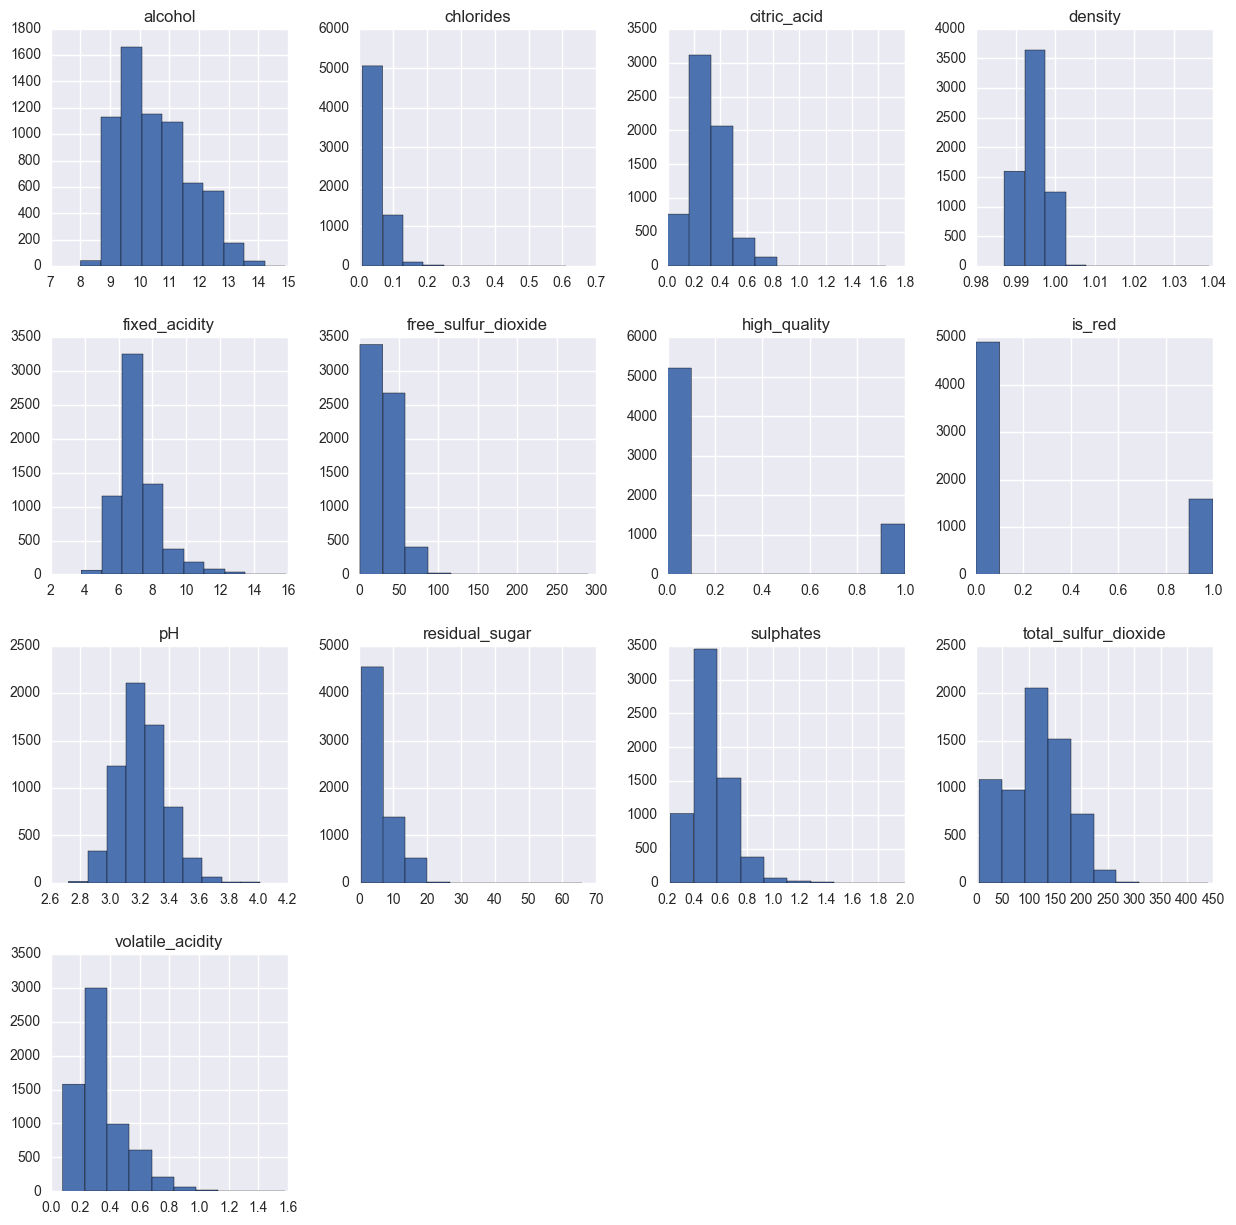

In [26]:
# TODO
pd.DataFrame.hist(df, figsize = [15,15])

In [29]:
# TODO
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.049447
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.151714
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.054444
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.161781
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.014767
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.033971


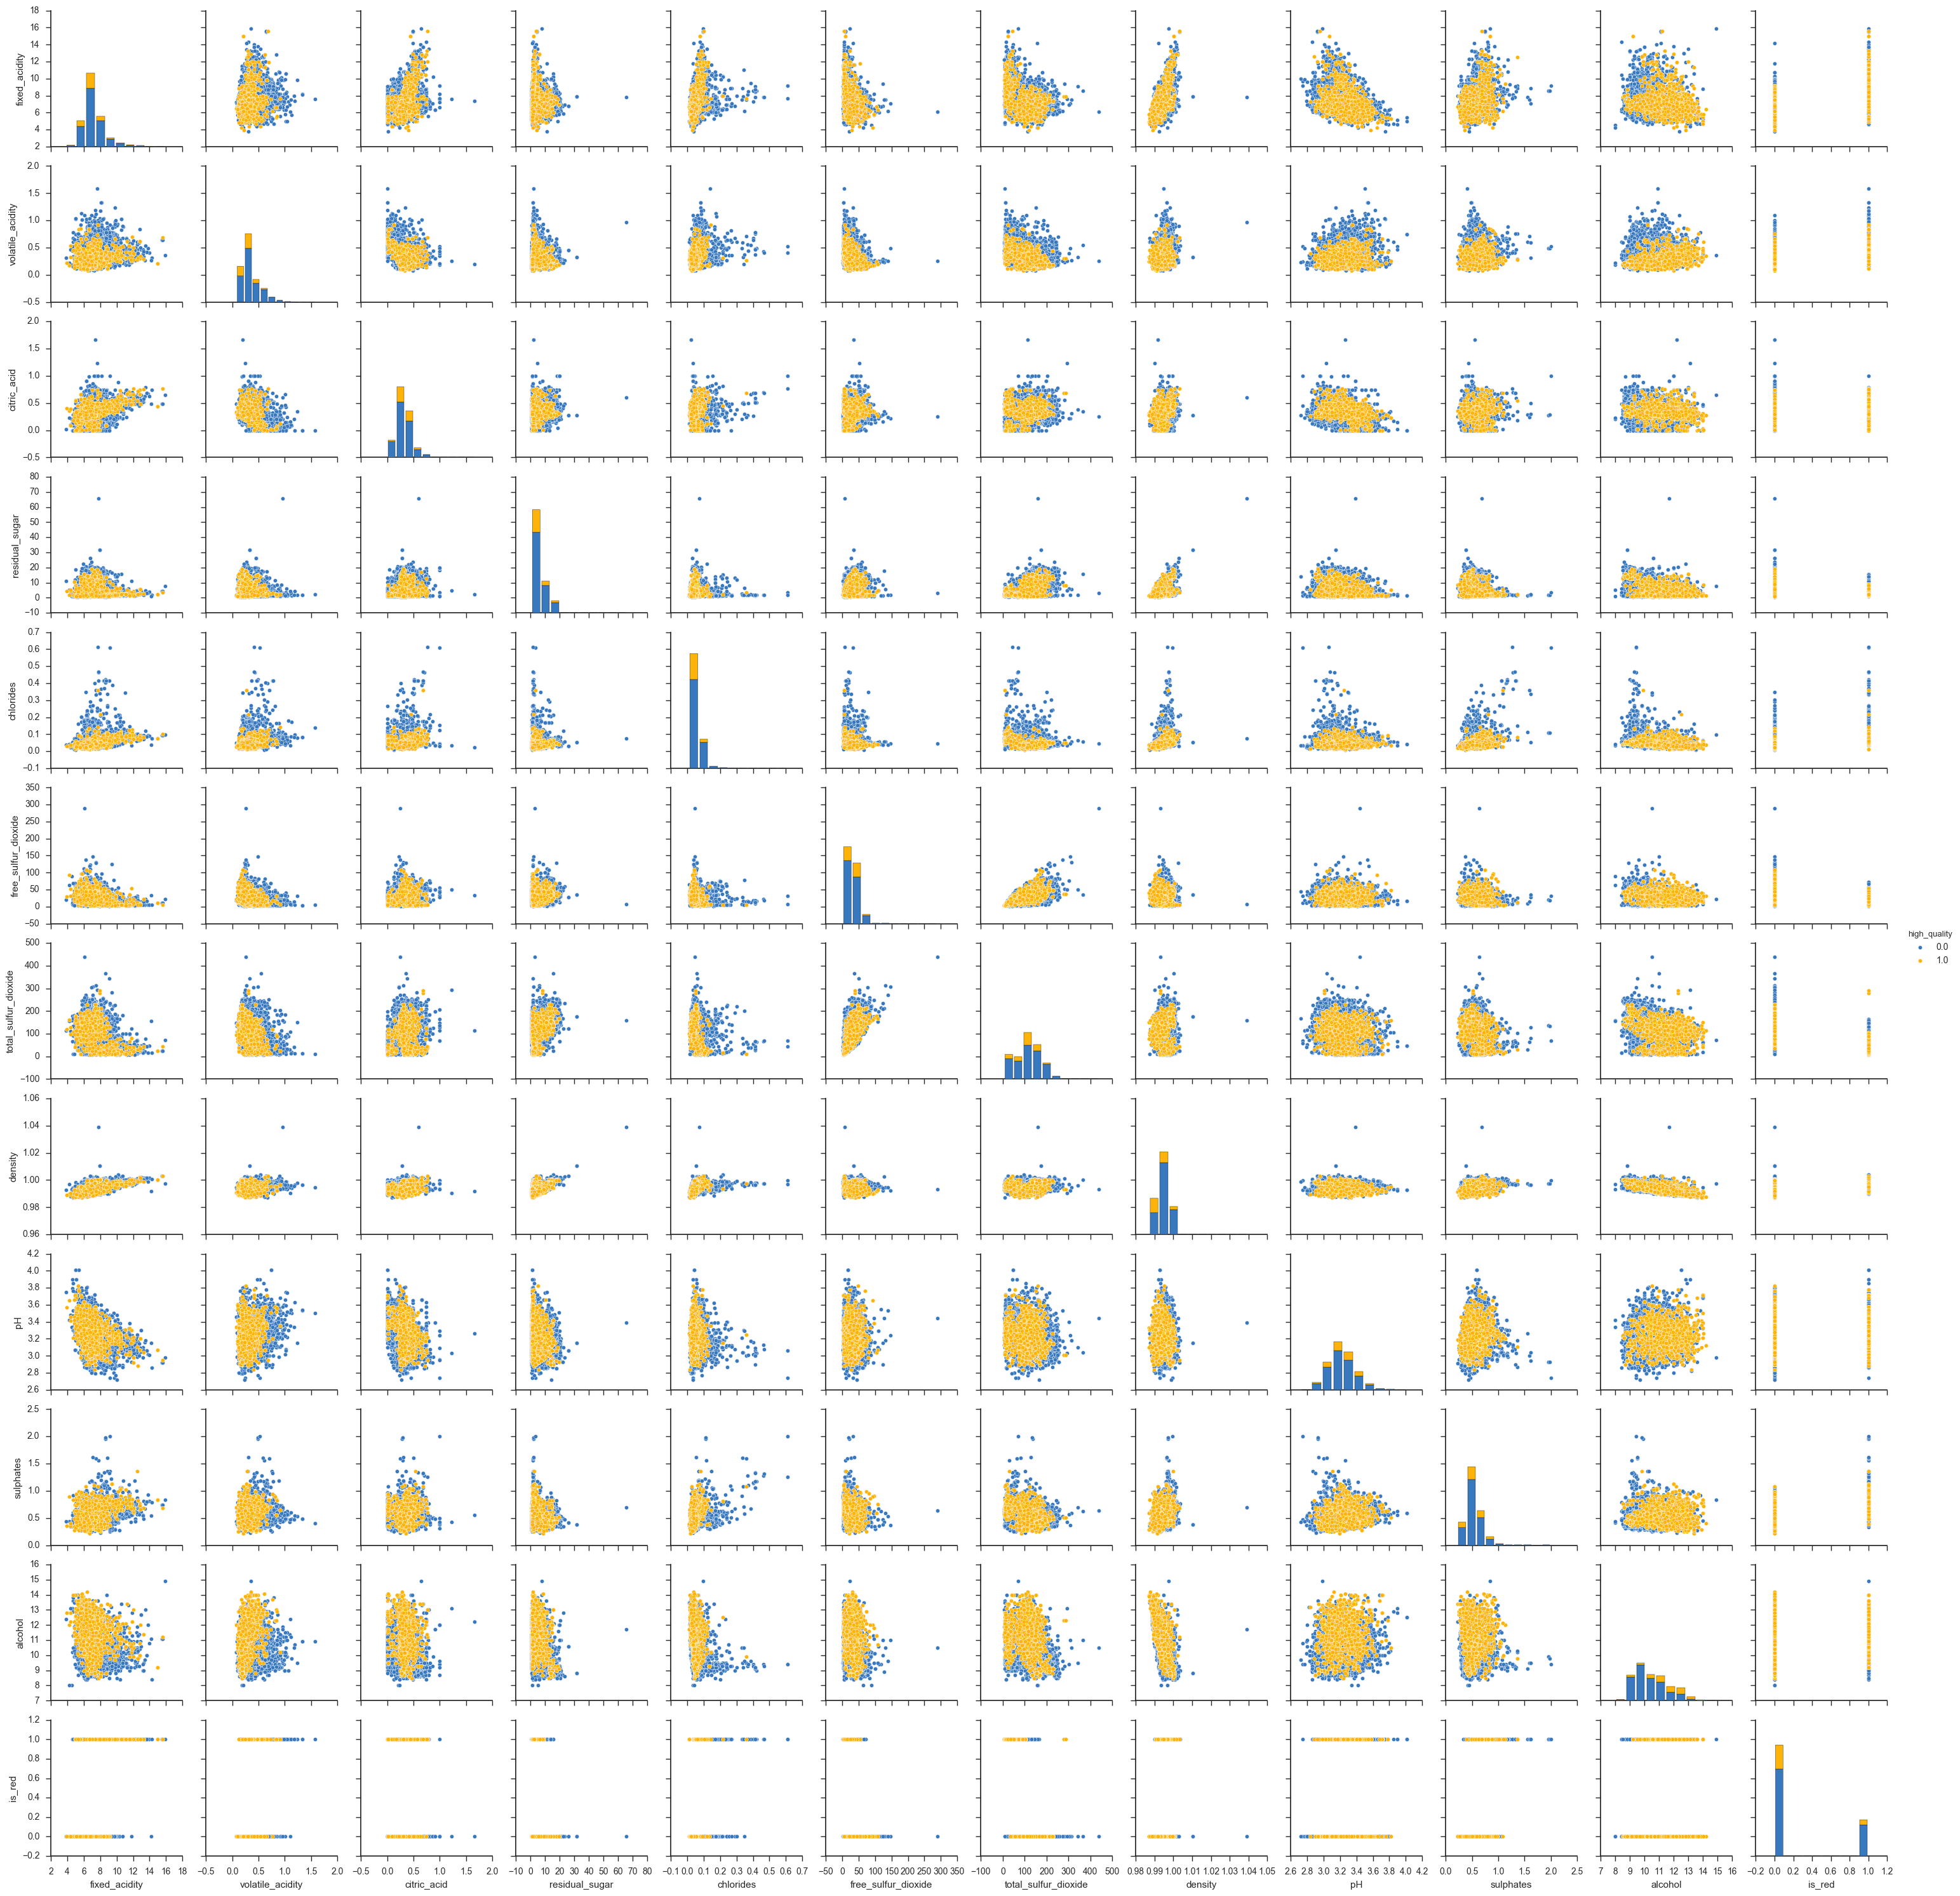

In [32]:
sns.set(style="ticks", color_codes=True)
var_pairs = sns.pairplot(df, vars=[x for x in df if x != 'high_quality'], 
                         hue="high_quality", palette=sns.xkcd_palette(['windows blue', 'amber']))

#### Build K-Nearest Neighbors model to predict whether or not a wine is high quality
- Select features you think will be predictive of high quality wines
- Scale the dataset (remember, this is so that each variable contributes equally to the distance computation)
- Evaluate the accuracy of your model using cross-validation
- Evaluate different values of `n` to see how the number of neighbors affects the classification accuracy

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
# TODO
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

Y = df['high_quality'].values
X = df[[x for x in df.columns.values if x not in ['high_quality']]].values

from sklearn import cross_validation

cv_indices = cross_validation.StratifiedKFold(Y, n_folds=5)


In [121]:
# TODO
def accuracy_crossvalidator(X, Y, knn, cv_indices):
    scores = []
    for train_i, test_i in cv_indices:
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        Y_train = Y[train_i]
        Y_test = Y[test_i]

        knn.fit(X_train, Y_train)
        
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))

accuracy_crossvalidator(X, Y, knn, cv_indices)

('Fold accuracy:', 0.80384615384615388)
('Fold accuracy:', 0.77538461538461534)
('Fold accuracy:', 0.77598152424942268)
('Fold accuracy:', 0.75904541955350269)
('Fold accuracy:', 0.72132409545804466)
('Mean CV accuracy:', 0.76711636169834785)


# Scaling the data using preprocessing.MinMaxScaler

In [122]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

Xs = scaler.fit_transform(X)
Ys = scaler.fit_transform(Y)

accuracy_crossvalidator(Xs, Ys, knn, cv_indices)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Shreyas/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


('Fold accuracy:', 0.81538461538461537)
('Fold accuracy:', 0.7976923076923077)
('Fold accuracy:', 0.80523479599692072)
('Fold accuracy:', 0.78598922247882985)
('Fold accuracy:', 0.73441108545034639)
('Mean CV accuracy:', 0.78774240540060403)


# Taking in only features with positive Correlation and scaling

In [125]:
X_pos = df[['citric_acid', 'free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']].values

# using scalar fit
Xs_pos = scaler.fit_transform(X_pos)
accuracy_crossvalidator(Xs_pos, Ys, knn, cv_indices)

('Fold accuracy:', 0.80000000000000004)
('Fold accuracy:', 0.78923076923076918)
('Fold accuracy:', 0.79368745188606615)
('Fold accuracy:', 0.77136258660508084)
('Fold accuracy:', 0.75057736720554269)
('Mean CV accuracy:', 0.78097163498549171)


# Features with good correlation and scaling

In [126]:
X_vars = df[['volatile_acidity','chlorides', 'density', 'alcohol']].values
Xs_vars = scaler.fit_transform(X_pos)
accuracy_crossvalidator(X_vars, Ys, knn, cv_indices)

('Fold accuracy:', 0.8107692307692308)
('Fold accuracy:', 0.77615384615384619)
('Fold accuracy:', 0.80985373364126256)
('Fold accuracy:', 0.7659738260200154)
('Fold accuracy:', 0.74826789838337182)
('Mean CV accuracy:', 0.78220370699354524)


# All features and scaling. n_neighbors = 6

In [132]:
# TODO
knn = KNeighborsClassifier(n_neighbors=6,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

Y = df['high_quality'].values
X = df[[x for x in df.columns.values if x not in ['high_quality']]].values

Xs_10 = scaler.fit_transform(X)
accuracy_crossvalidator(Xs_10, Ys, knn, cv_indices)

('Fold accuracy:', 0.81384615384615389)
('Fold accuracy:', 0.80076923076923079)
('Fold accuracy:', 0.81832178598922245)
('Fold accuracy:', 0.80369515011547343)
('Fold accuracy:', 0.75519630484988454)
('Mean CV accuracy:', 0.79836572511399295)


# All features , n = 8

In [129]:
# TODO
knn = KNeighborsClassifier(n_neighbors=8,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

Y = df['high_quality'].values
X = df[[x for x in df.columns.values if x not in ['high_quality']]].values

Xs_10 = scaler.fit_transform(X)
accuracy_crossvalidator(Xs_10, Ys, knn, cv_indices)

('Fold accuracy:', 0.81230769230769229)
('Fold accuracy:', 0.80000000000000004)
('Fold accuracy:', 0.82140107775211701)
('Fold accuracy:', 0.80061585835257887)
('Fold accuracy:', 0.75442648190916084)
('Mean CV accuracy:', 0.79775022206430979)


# n_neighbors=6, ie number of neighbours of 6 gave highest mean CV accuracy for the model with all features after scaling.


In [133]:
X_vars = df[['alcohol']].values
Xs_vars = scaler.fit_transform(X_pos)
accuracy_crossvalidator(X_vars, Ys, knn, cv_indices)

('Fold accuracy:', 0.80538461538461537)
('Fold accuracy:', 0.8092307692307692)
('Fold accuracy:', 0.80061585835257887)
('Fold accuracy:', 0.79676674364896072)
('Fold accuracy:', 0.76828329484218627)
('Mean CV accuracy:', 0.7960562562918222)
